# Importing our libraries

In [1]:
# Imports
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from random import sample
from itertools import combinations
from statsmodels.stats.power import TTestIndPower, TTestPower
import math
import seaborn as sns
import scipy as sp
import pandas as pd
from matplotlib.lines import Line2D
import random
import statsmodels.api as sm
from itertools import combinations
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from statsmodels.stats.stattools import jarque_bera
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_absolute_error, mean_squared_error

import num_model_all_combos as simple_test

# Creating and cleaning first dataframe

In [2]:
# creating initial data frame
df = pd.read_csv('data/kc_house_data.csv')

In [3]:
# checking original df
df.head(1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052


In [4]:
df.shape

(30155, 25)

In [5]:
# checking for nulls
df.isna().sum().sum()

46

In [6]:
# dropping nulls
df.dropna(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30111 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30111 non-null  int64  
 1   date           30111 non-null  object 
 2   price          30111 non-null  float64
 3   bedrooms       30111 non-null  int64  
 4   bathrooms      30111 non-null  float64
 5   sqft_living    30111 non-null  int64  
 6   sqft_lot       30111 non-null  int64  
 7   floors         30111 non-null  float64
 8   waterfront     30111 non-null  object 
 9   greenbelt      30111 non-null  object 
 10  nuisance       30111 non-null  object 
 11  view           30111 non-null  object 
 12  condition      30111 non-null  object 
 13  grade          30111 non-null  object 
 14  heat_source    30111 non-null  object 
 15  sewer_system   30111 non-null  object 
 16  sqft_above     30111 non-null  int64  
 17  sqft_basement  30111 non-null  int64  
 18  sqft_g

In [8]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.011100e+04,3.011100e+04,30111.000000,30111.000000,30111.000000,3.011100e+04,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000
mean,4.539171e+09,1.108971e+06,3.415197,2.335708,2113.342798,1.664880e+04,1.543506,1810.389658,476.617117,330.475308,217.451264,1975.162299,90.792767,47.328482,-121.318872
std,2.882236e+09,8.965158e+05,0.979755,0.888293,973.453260,5.993303e+04,0.567789,877.726339,579.805355,285.725020,245.301991,32.052930,416.197627,1.433309,5.724073
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.070850e+09,6.492360e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405348,-122.326075
50%,3.876000e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.477000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551440,-122.225790
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2620.000000,1.056800e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669917,-122.116394
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


# First Baseline Model

In [9]:
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.608616
sqft_above       0.538631
bathrooms        0.480337
sqft_patio       0.313789
bedrooms         0.288954
sqft_garage      0.263674
sqft_basement    0.245005
floors           0.180589
yr_built         0.095796
sqft_lot         0.086550
yr_renovated     0.085023
lat              0.063430
long            -0.022278
id              -0.034096
Name: price, dtype: float64

In [10]:
# creating baseline model based on highest .corr() to price (ran above)
X = df[['sqft_living']]
y = df['price']

model = sm.OLS(y, sm.add_constant(X)).fit()
# viewing the baseline model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                 1.771e+04
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        20:02:14   Log-Likelihood:            -4.4847e+05
No. Observations:               30111   AIC:                         8.969e+05
Df Residuals:                   30109   BIC:                         8.970e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7.559e+04   9798.815     -7.714      0.000   -9.48e+04   -5.64e+04
sqft_living   560.5134      4.211    133.096      0.000     552.259     568.768
==============================================================================
Omnibus:                    43384.874   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         47187801.072
Skew:                           8.195   Prob(JB):                         0.00
Kurtosis:                     196.242   Cond. No.                     5.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Dropping Outliers in Sale Price

Dropping Outliers of price to within 3 standard deviations
- Only losing .6 percent of data

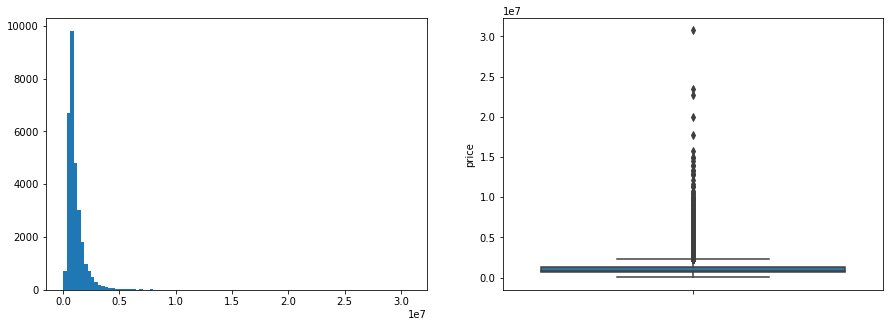

In [11]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))
ax1.hist(df['price'], bins=100)
sns.boxplot(y =df['price']);

In [12]:
df_no_outliers = df[(df['price'] > np.percentile(df['price'], .3)) & (df['price'] < np.percentile(df['price'], 99.7))]

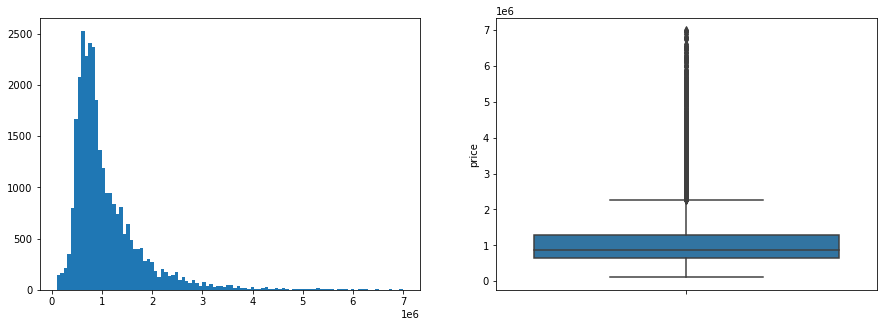

In [13]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))
ax1.hist(df_no_outliers['price'], bins=100)
sns.boxplot(y =df_no_outliers['price']);

In [14]:
df_no_outliers.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,2.992700e+04,2.992700e+04,29927.000000,29927.000000,29927.000000,2.992700e+04,29927.000000,29927.000000,29927.000000,29927.000000,29927.000000,29927.000000,29927.000000,29927.000000,29927.000000
mean,4.541369e+09,1.084893e+06,3.413673,2.330888,2105.252448,1.657447e+04,1.543222,1804.699368,473.342533,329.974338,215.996959,1975.169746,89.750627,47.328459,-121.321354
std,2.882145e+09,7.201688e+05,0.977299,0.877375,950.536144,5.997309e+04,0.567573,863.246578,572.185345,284.019578,242.024168,32.048907,413.920695,1.428233,5.714484
min,1.000055e+06,1.041860e+05,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.077450e+09,6.500000e+05,3.000000,2.000000,1420.000000,4.840000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.404785,-122.326340
50%,3.876002e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.460000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551305,-122.225740
75%,7.297200e+09,1.300000e+06,4.000000,3.000000,2610.000000,1.050700e+04,2.000000,2270.000000,940.000000,510.000000,312.000000,2003.000000,0.000000,47.670115,-122.116020
max,9.904000e+09,6.995000e+06,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,4520.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


# Creating a new DF that now has features dropped
### These columns are not relevant for a variety of reasons listed below

- Drop ID: just a unique identifier, no helpful info
- Drop adress and lat/long: Location not important in this analysis
- Drop year renovated and year built: not relevant for remodeling purposes
- Drop date: last sale date is not relevant to remodeling home
- Drop sq ft lot: Cannot change lot size by remodeling home
- Waterfront: remove, we cannot change the house location to be moved next to water
- Greenbelt: remove, we cannot change the house location to be moved next to a greenbelt
- View: remove, we cannot change the house location to have a good view
- Sewer System: not likely to change your entire sewer system during a home remodel

In [15]:
# Dropping columns that seem to have little effect
df_dropped = df_no_outliers.drop(['id', 'address', 'lat', 'long', 'yr_built', 
                                  'date', 'sqft_lot', 'waterfront', 'greenbelt',
                                  'view', 'yr_renovated', 'sewer_system'], axis = 1)

In [16]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29927 entries, 0 to 30154
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          29927 non-null  float64
 1   bedrooms       29927 non-null  int64  
 2   bathrooms      29927 non-null  float64
 3   sqft_living    29927 non-null  int64  
 4   floors         29927 non-null  float64
 5   nuisance       29927 non-null  object 
 6   condition      29927 non-null  object 
 7   grade          29927 non-null  object 
 8   heat_source    29927 non-null  object 
 9   sqft_above     29927 non-null  int64  
 10  sqft_basement  29927 non-null  int64  
 11  sqft_garage    29927 non-null  int64  
 12  sqft_patio     29927 non-null  int64  
dtypes: float64(3), int64(6), object(4)
memory usage: 3.2+ MB


- categorical numeric:
    - floors

## Creating a DF with just continuous numerical data
### Dropping numerical categorical variables

In [17]:
# Creating new df with only numerical columns and 
# dropping numerical categorical columns
df_numeric = df_dropped.drop(['floors'], axis = 1).select_dtypes('number')

In [18]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29927 entries, 0 to 30154
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          29927 non-null  float64
 1   bedrooms       29927 non-null  int64  
 2   bathrooms      29927 non-null  float64
 3   sqft_living    29927 non-null  int64  
 4   sqft_above     29927 non-null  int64  
 5   sqft_basement  29927 non-null  int64  
 6   sqft_garage    29927 non-null  int64  
 7   sqft_patio     29927 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 2.1 MB


In [19]:
df_numeric.head()

,price,bedrooms,bathrooms,sqft_living,sqft_above,sqft_basement,sqft_garage,sqft_patio
0,675000.0,4,1.0,1180,1180,0,0,40
1,920000.0,5,2.5,2770,1570,1570,0,240
2,311000.0,6,2.0,2880,1580,1580,0,0
3,775000.0,3,3.0,2160,1090,1070,200,270
4,592500.0,2,2.0,1120,1120,550,550,30


### Running baseline simple test after dropping outliers in sale price

In [20]:
simple_df = simple_test.simple_num_model_all_combos(df_numeric, 'price')

In [21]:
simple_df

,column,r2,r2_adj,f_stat_p_val,const_coefs,const_p_val,predictor_coef,predictor_p_val
2,sqft_living,0.430194,0.430175,0,38722.8,3.98806e-07,496.933,0
3,sqft_above,0.340758,0.340736,0,206018,9.94432e-151,486.993,0
1,bathrooms,0.267731,0.267706,0,94928.3,6.58601e-21,424716,0
0,bedrooms,0.11369,0.11366,0,236711,9.00519e-62,248466,0
6,sqft_patio,0.0958406,0.0958104,0,885918,0,921.192,0
5,sqft_garage,0.0880874,0.0880569,0,836566,0,752.563,0
4,sqft_basement,0.0566526,0.056621,0,943091,0,299.576,0


New baseline explains 43% of the variance compared to 37% in first baseline model.

### Running baseline multi regression after dropping outliers in sale price

In [22]:
multi_df, _ = simple_test.multi_num_model_all_combos(df_numeric, 'price')

The top three combos are: 
    - ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio'] 
    	- adj_r2: 0.45515322897467025 
    	- ratio of p-vals <.05: 100.0
    - ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_above', 'sqft_basement', 'sqft_garage'] 
    	- adj_r2: 0.45287926866078276, 
    	- ratio of p-vals <.05: 100.0
    - ['bedrooms', 'sqft_living', 'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio'] 
    	- adj_r2: 0.45246408806886096, 
    	- ratio of p-vals <.05: 100.0


In [23]:
multi_df.head(15)

,index,column,r2,r2_adj,f_stat_p_val,const_coefs,const_p_val,%p_val < .05,MAE,RMSE
0,126,"[bedrooms, bathrooms, sqft_living, sqft_above,...",0.455281,0.455153,0,159179,0,100,353386,531512
1,119,"[bedrooms, bathrooms, sqft_living, sqft_above,...",0.452989,0.452879,0,168629,0,100,354496,532629
2,124,"[bedrooms, sqft_living, sqft_above, sqft_basem...",0.452574,0.452464,0,197896,0,100,353549,532831
3,120,"[bedrooms, bathrooms, sqft_living, sqft_above,...",0.451363,0.451253,0,169802,0,100,355847,533421
4,108,"[bedrooms, sqft_living, sqft_above, sqft_basem...",0.450018,0.449926,0,209788,0,100,354872,534074
5,121,"[bedrooms, bathrooms, sqft_living, sqft_above,...",0.449505,0.449394,0,199265,0,100,356369,534323
6,109,"[bedrooms, sqft_living, sqft_above, sqft_basem...",0.449396,0.449304,0,202106,0,100,355866,534376
7,98,"[bedrooms, bathrooms, sqft_living, sqft_above,...",0.449282,0.44919,0,178530,0,100,356968,534431
8,122,"[bedrooms, bathrooms, sqft_living, sqft_baseme...",0.449202,0.449091,0,209202,0,100,355784,534470
9,103,"[bedrooms, bathrooms, sqft_living, sqft_garage...",0.448785,0.448693,0,209065,0,100,356325,534672


In [24]:
for i in range(15):
    print(multi_df['column'][i+1])

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_above', 'sqft_basement', 'sqft_garage']
['bedrooms', 'sqft_living', 'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio']
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_above', 'sqft_basement', 'sqft_patio']
['bedrooms', 'sqft_living', 'sqft_above', 'sqft_basement', 'sqft_garage']
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_above', 'sqft_garage', 'sqft_patio']
['bedrooms', 'sqft_living', 'sqft_above', 'sqft_basement', 'sqft_patio']
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_above', 'sqft_basement']
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_basement', 'sqft_garage', 'sqft_patio']
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_garage', 'sqft_patio']
['bedrooms', 'bathrooms', 'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio']
['bedrooms', 'sqft_living', 'sqft_above', 'sqft_garage', 'sqft_patio']
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_basement', 'sqft_garage']
['bedrooms', 'sqft_living', 'sqft_above', 'sqft_b

In [25]:
y=df_numeric['price']
X = df_numeric[['bedrooms', 'sqft_living', 'sqft_above', 'sqft_basement']]

results = sm.OLS(endog = y, exog = sm.add_constant(X)).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     6049.
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        20:02:16   Log-Likelihood:            -4.3723e+05
No. Observations:               29927   AIC:                         8.745e+05
Df Residuals:                   29922   BIC:                         8.745e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.133e+05   1.15e+04     18.509      0.000    1.91e+05    2.36e+05
bedrooms      -1.037e+05   4133.641    -25.092      0.000   -1.12e+05   -9.56e+04
sqft_living     371.2854     13.527     27.448      0.000     344.772     397.799
sqft_above      201.1674     13.800     14.578      0.000     174.119     228.216
sqft_basement   171.0904     10.375     16.490      0.000     150.754     191.426
==============================================================================
Omnibus:                    14680.257   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           196437.354
Skew:                           2.029   Prob(JB):                         0.00
Kurtosis:                      14.877   Cond. No.                     1.19e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Selecting our multi baseline and general results
- simple regression has sqft_living as the best indicator
    - adjusted r score of 43%
- multi-linear regression has ['bedrooms', 'sqft_living', 'sqft_above', 'sqft_basement']
    - adjusted r score of 44.7%

# Checking Multicolinearity

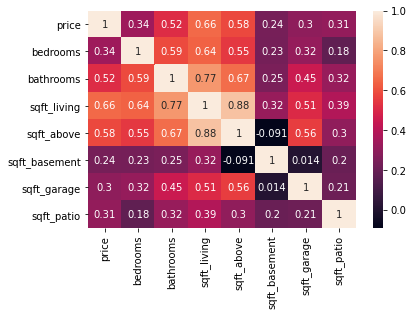

In [26]:
sns.heatmap(df_numeric.corr(), annot=True);

### Sq Ft Living and Sq Ft above are the only two columns that are highly correlated (>.75) that we are using
Dropping Sqft above as it has a lower correlation to price

In [27]:
y=df_numeric['price']
X = df_numeric[['bedrooms', 'sqft_living', 'sqft_basement']]

results = sm.OLS(endog = y, exog = sm.add_constant(X)).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     7938.
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        20:02:17   Log-Likelihood:            -4.3734e+05
No. Observations:               29927   AIC:                         8.747e+05
Df Residuals:                   29923   BIC:                         8.747e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.498e+05   1.13e+04     22.127      0.000    2.28e+05    2.72e+05
bedrooms      -1.057e+05   4146.034    -25.489      0.000   -1.14e+05   -9.76e+04
sqft_living     557.9546      4.375    127.539      0.000     549.380     566.529
sqft_basement    44.8683      5.736      7.822      0.000      33.625      56.112
==============================================================================
Omnibus:                    14703.414   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           195980.458
Skew:                           2.034   Prob(JB):                         0.00
Kurtosis:                      14.858   Cond. No.                     8.94e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.94e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Results of model:
- our model explains about 44.3% of the variance in our data
- our model is stat sig
- all coefs are stat sig with alpha of .05

Interpretations:
- for a house with no bedrooms, sqft_living, or sqft basement, we would expect the house to be valued about \\$249,800
- for each additional bedroom, we would expect it to lose value of \\$105,700
- for each additional sq ft living space, we would expect the house to gain \\$558
- for each additional sq ft of basement, we would expect the house to gain about $44

## Standardizing data

In [28]:
# df_standardized = df_numeric.drop(['price'], axis=1).copy()
df_standardized = df_numeric.copy()


for col in df_standardized:
    df_standardized[col] = (df_standardized[col] - df_standardized[col].mean()) / df_standardized[col].std()
    
# df_standardized['price'] = df_numeric['price']
df_standardized.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_above,sqft_basement,sqft_garage,sqft_patio
count,2.992700e+04,2.992700e+04,2.992700e+04,2.992700e+04,2.992700e+04,2.992700e+04,2.992700e+04,2.992700e+04
mean,-1.025677e-16,-4.107458e-17,-1.120647e-16,1.479160e-16,1.119460e-16,1.567007e-17,-4.416111e-17,2.279283e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.361774e+00,-3.492967e+00,-2.656663e+00,-2.211649e+00,-2.088279e+00,-8.272539e-01,-1.161801e+00,-8.924603e-01
25%,-6.038763e-01,-4.232822e-01,-3.771348e-01,-7.209115e-01,-7.236627e-01,-8.272539e-01,-1.161801e+00,-7.271875e-01
50%,-3.122780e-01,-4.232822e-01,1.927472e-01,-1.948926e-01,-2.834640e-01,-8.272539e-01,2.465522e-01,-2.726875e-01
75%,2.986898e-01,5.999461e-01,7.626291e-01,5.310135e-01,5.390124e-01,8.155705e-01,6.338495e-01,3.966672e-01
max,8.206558e+00,9.809000e+00,9.310858e+00,1.394450e+01,1.257497e+01,7.072284e+00,1.144296e+01,1.716359e+01


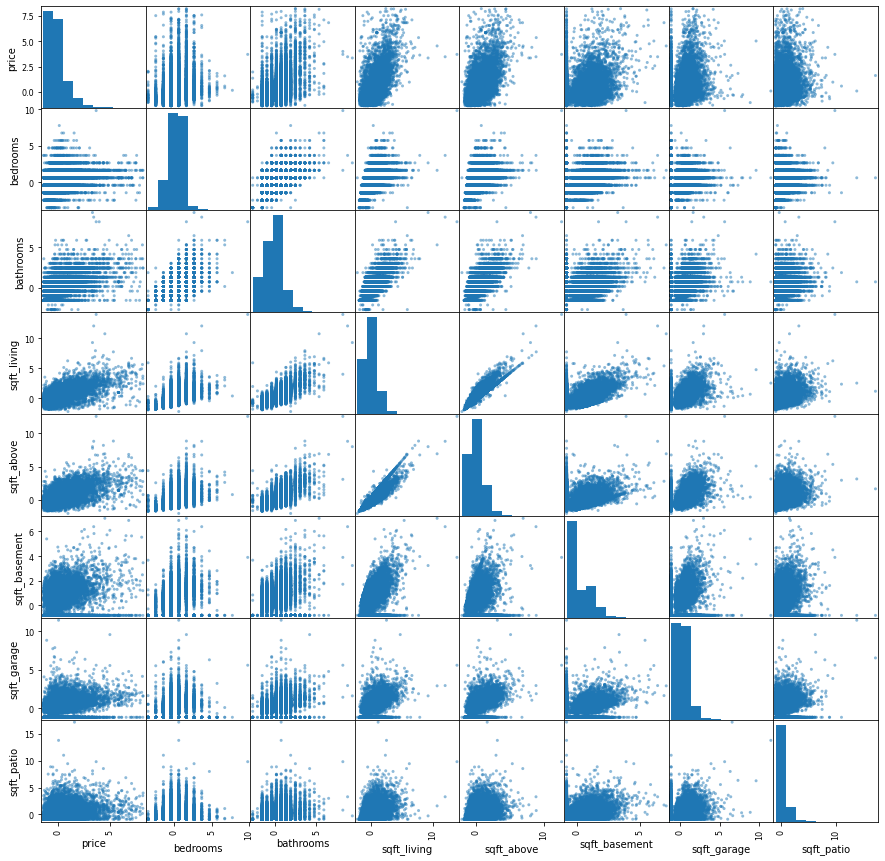

In [29]:
# Looking at a scatter matrix of just continuous numerical data
pd.plotting.scatter_matrix(df_standardized,figsize  = [15, 15]);

## Bedrooms looks like its curved, what if we take the sqrt of it?

In [30]:
df_standardized['sqrt_bedrooms'] = np.sqrt(df_standardized['bedrooms'].copy())

## Doesnt work, creates inf/nan so we cant run a model

### Running model again after standardizing

In [31]:
y=df_standardized['price']
X = df_standardized[['bedrooms', 'sqft_living', 'sqft_basement']]

results = sm.OLS(endog = y, exog = sm.add_constant(X)).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     7938.
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        20:02:21   Log-Likelihood:                -33704.
No. Observations:               29927   AIC:                         6.742e+04
Df Residuals:                   29923   BIC:                         6.745e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -9.801e-17      0.004  -2.27e-14      1.000      -0.008       0.008
bedrooms         -0.1434      0.006    -25.489      0.000      -0.154      -0.132
sqft_living       0.7364      0.006    127.539      0.000       0.725       0.748
sqft_basement     0.0356      0.005      7.822      0.000       0.027       0.045
==============================================================================
Omnibus:                    14703.414   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           195980.458
Skew:                           2.034   Prob(JB):                         0.00
Kurtosis:                      14.858   Cond. No.                         2.28
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__By looking at this model, we can see that sqft living has the largest impact on the house price__
- next would be the negative correlation associated with additional bedrooms
- next would be additional basement sq ft

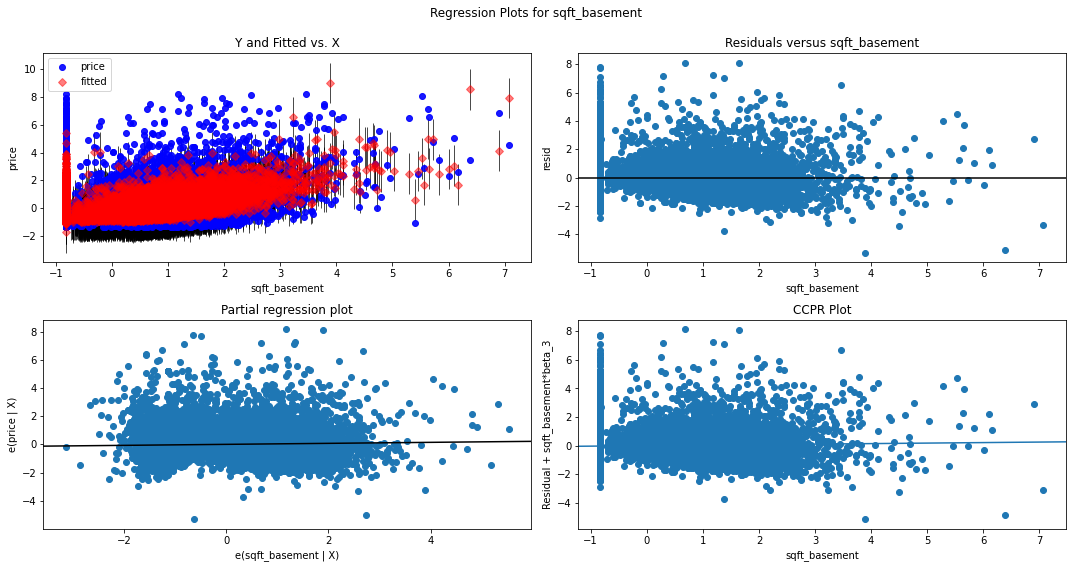

In [32]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(results, "sqft_basement", fig=fig)
plt.show()

# What if we try to log all of the predictor variables?

### This didnt work, the only two that worked were sq ft living and sq ft above
#### Since we dropped sq ft above, I am only running sq ft living

In [33]:
X_log = df_numeric.copy()
X_log['log(sqft_living)'] = np.log(df_numeric['sqft_living'])
X_log

,price,bedrooms,bathrooms,sqft_living,sqft_above,sqft_basement,sqft_garage,sqft_patio,log(sqft_living)
0,675000.0,4,1.0,1180,1180,0,0,40,7.073270
1,920000.0,5,2.5,2770,1570,1570,0,240,7.926603
2,311000.0,6,2.0,2880,1580,1580,0,0,7.965546
3,775000.0,3,3.0,2160,1090,1070,200,270,7.677864
4,592500.0,2,2.0,1120,1120,550,550,30,7.021084
...,...,...,...,...,...,...,...,...,...
30150,1555000.0,5,2.0,1910,1600,1130,0,210,7.554859
30151,1313000.0,3,2.0,2020,2020,0,0,520,7.610853
30152,800000.0,3,2.0,1620,940,920,240,110,7.390181
30153,775000.0,3,2.5,2570,1830,740,480,100,7.851661


## Lets run a model with logged predictors

In [34]:
simple_df = simple_test.simple_num_model_all_combos(X_log, 'price')

In [35]:
simple_df

,column,r2,r2_adj,f_stat_p_val,const_coefs,const_p_val,predictor_coef,predictor_p_val
2,sqft_living,0.430194,0.430175,0,38722.8,3.98806e-07,496.933,0
3,sqft_above,0.340758,0.340736,0,206018,9.94432e-151,486.993,0
7,log(sqft_living),0.336172,0.33615,0,-6.09171e+06,0,949639,0
1,bathrooms,0.267731,0.267706,0,94928.3,6.58601e-21,424716,0
0,bedrooms,0.11369,0.11366,0,236711,9.00519e-62,248466,0
6,sqft_patio,0.0958406,0.0958104,0,885918,0,921.192,0
5,sqft_garage,0.0880874,0.0880569,0,836566,0,752.563,0
4,sqft_basement,0.0566526,0.056621,0,943091,0,299.576,0


## Going to run a multi test with all log and not log and see what happens

In [36]:
X_log2 = X_log.drop(['sqft_above', 'sqft_living'], axis=1).copy()

In [37]:
multi_df, _ = simple_test.multi_num_model_all_combos(X_log2, 'price')

The top three combos are: 
    - ['bedrooms', 'bathrooms', 'sqft_basement', 'sqft_garage', 'sqft_patio', 'log(sqft_living)'] 
    	- adj_r2: 0.3698277520027409 
    	- ratio of p-vals <.05: 100.0
    - ['bedrooms', 'bathrooms', 'sqft_basement', 'sqft_patio', 'log(sqft_living)'] 
    	- adj_r2: 0.3697219720593167, 
    	- ratio of p-vals <.05: 100.0
    - ['bedrooms', 'bathrooms', 'sqft_garage', 'sqft_patio', 'log(sqft_living)'] 
    	- adj_r2: 0.3675263632991116, 
    	- ratio of p-vals <.05: 100.0


In [38]:
multi_df.head()

,index,column,r2,r2_adj,f_stat_p_val,const_coefs,const_p_val,%p_val < .05,MAE,RMSE
0,62,"[bedrooms, bathrooms, sqft_basement, sqft_gara...",0.369954,0.369828,0,-4.92302e+06,0,100,387973,571628
1,58,"[bedrooms, bathrooms, sqft_basement, sqft_pati...",0.369827,0.369722,0,-4.85567e+06,0,100,388057,571685
2,59,"[bedrooms, bathrooms, sqft_garage, sqft_patio,...",0.367632,0.367526,0,-5.10381e+06,0,100,389407,572680
3,46,"[bedrooms, bathrooms, sqft_patio, log(sqft_liv...",0.367215,0.36713,0,-4.99378e+06,0,100,389672,572869
4,57,"[bedrooms, bathrooms, sqft_basement, sqft_gara...",0.363179,0.363073,0,-5.21307e+06,0,83.3333,390574,574693


### This didnt pan out, dont log scale stuff
*All of the associated adjusted r^2 are much less than our previous model*

# What if we try to log the target variable

Price looks to be incredibly right skewed, lets blow that one up for a closer look

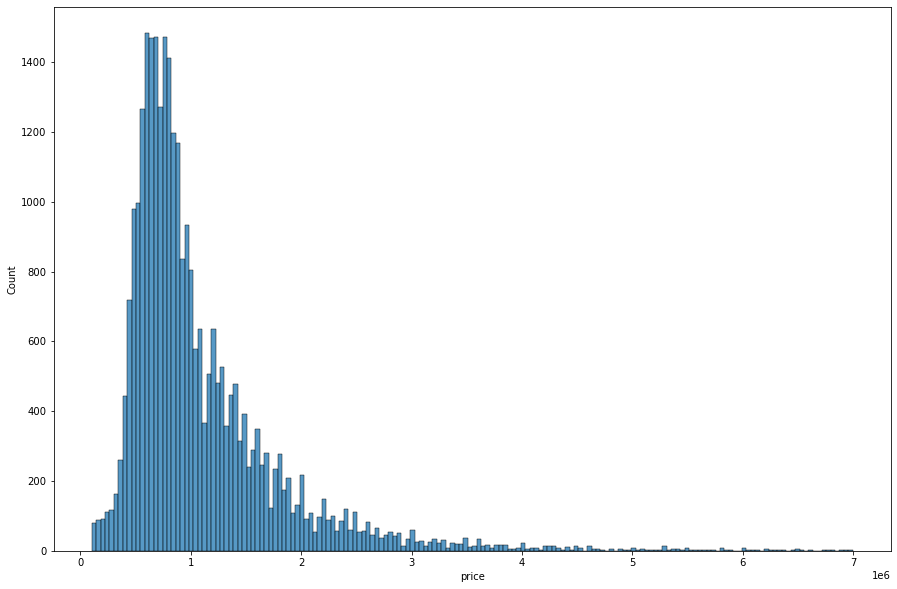

In [39]:
fig, ax = plt.subplots(figsize = (15,10))
sns.histplot(df_numeric['price'], bins = int(np.sqrt(len(df_numeric['price']))));

If we log the saleprice, does that make it look any more normal?

In [40]:
y_log = np.log(df_numeric['price'])
X = df_numeric[['sqft_living']]

log_model = sm.OLS(y_log, sm.add_constant(X)).fit()

In [41]:
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                 2.020e+04
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        20:02:23   Log-Likelihood:                -16792.
No. Observations:               29927   AIC:                         3.359e+04
Df Residuals:                   29925   BIC:                         3.361e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.9649      0.006   2176.234      0.000      12.953      12.977
sqft_living     0.0004   2.58e-06    142.111      0.000       0.000       0.000
==============================================================================
Omnibus:                     2324.497   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8890.917
Skew:                          -0.324   Prob(JB):                         0.00
Kurtosis:                       5.590   Cond. No.                     5.61e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.61e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Running a multi-linear regression with the logged y-scale

In [42]:
y_log = np.log(df_numeric['price'])
X = df_numeric[['bedrooms', 'sqft_living', 'sqft_basement']]

log_model = sm.OLS(endog = y, exog = sm.add_constant(X)).fit()

log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     7938.
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        20:02:23   Log-Likelihood:                -33704.
No. Observations:               29927   AIC:                         6.742e+04
Df Residuals:                   29923   BIC:                         6.745e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.1596      0.016    -73.982      0.000      -1.190      -1.129
bedrooms         -0.1467      0.006    -25.489      0.000      -0.158      -0.135
sqft_living       0.0008   6.07e-06    127.539      0.000       0.001       0.001
sqft_basement   6.23e-05   7.97e-06      7.822      0.000    4.67e-05    7.79e-05
==============================================================================
Omnibus:                    14703.414   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           195980.458
Skew:                           2.034   Prob(JB):                         0.00
Kurtosis:                      14.858   Cond. No.                     8.94e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.94e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

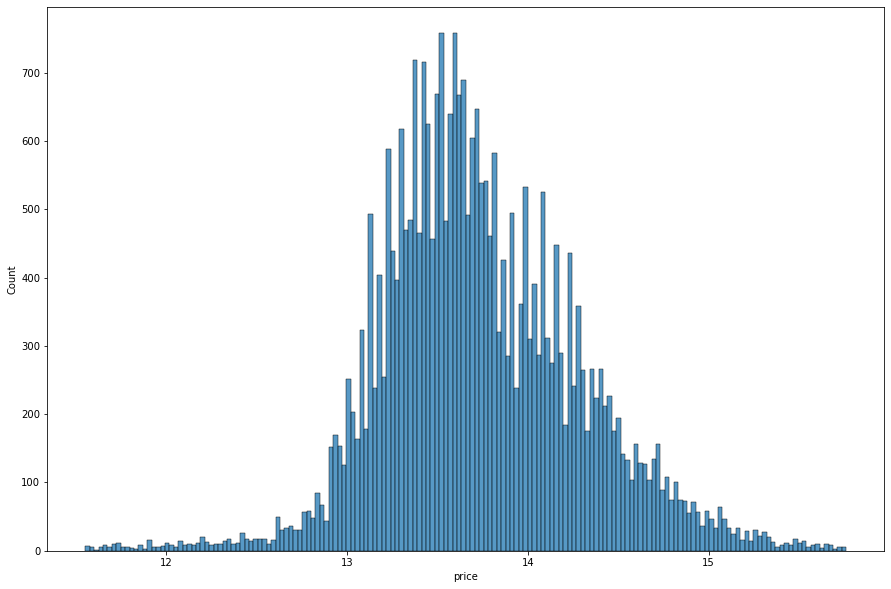

In [43]:
fig, ax = plt.subplots(figsize = (15,10))
sns.histplot(y_log, bins = int(np.sqrt(len(df_numeric['price']))));

It looks much more normal now. What does the coef mean?

In [44]:
y_log = np.log(df_numeric['price'])
X = df_numeric[['sqft_living', 'bedrooms', 'sqft_basement']]

log_model = sm.OLS(endog = y, exog = sm.add_constant(X)).fit()

log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     7938.
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        20:02:23   Log-Likelihood:                -33704.
No. Observations:               29927   AIC:                         6.742e+04
Df Residuals:                   29923   BIC:                         6.745e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.1596      0.016    -73.982      0.000      -1.190      -1.129
sqft_living       0.0008   6.07e-06    127.539      0.000       0.001       0.001
bedrooms         -0.1467      0.006    -25.489      0.000      -0.158      -0.135
sqft_basement   6.23e-05   7.97e-06      7.822      0.000    4.67e-05    7.79e-05
==============================================================================
Omnibus:                    14703.414   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           195980.458
Skew:                           2.034   Prob(JB):                         0.00
Kurtosis:                      14.858   Cond. No.                     8.94e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.94e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
(np.exp(log_model.params["sqft_living"]) - 1) * 100

0.07750555067078668

In [46]:
(np.exp(log_model.params["bedrooms"]) - 1) * 100

-13.64847889430757

In [47]:
(np.exp(log_model.params["sqft_basement"]) - 1) * 100

0.006230437302856551

- For each increase of 1 sq ft, we see an associated change of .0775% in price
- For each increase in basement sq ft by 1, we see an associate increase in homeprice of .006%
- for each additional bedroom, we see a decrease in value of 13% 

### Logged might help explain some stuff maybe

# Time to look at adding in categorical data

In [48]:
# Creating basic cat df based on dtype
df_cat = df_dropped.select_dtypes(object)

In [49]:
# adding numeric categories into cat df
df_cat['floors'] = df_dropped['floors'].copy()

In [50]:
df_cat.head()

,nuisance,condition,grade,heat_source,floors
0,NO,Good,7 Average,Gas,1.0
1,YES,Average,7 Average,Oil,1.0
2,NO,Average,7 Average,Gas,1.0
3,NO,Average,9 Better,Gas,2.0
4,YES,Average,7 Average,Electricity,2.0


What can be changed about each of the remaining?
- nuisance: improve sound damping in house (thicker insulation/windows) or install shrubs/large fence to mute noise
- condition (overall condition related to maintenance): paint house, do some landscaping
- heat_source: upgrade/change your heat source

## Lets start with the condition of the house

### Here's what the kings county website says:

Relative to age and grade. Coded 1-5.

1 = Poor- Worn out. Repair and overhaul needed on painted surfaces, roofing, plumbing, heating and numerous functional inadequacies. Excessive deferred maintenance and abuse, limited value-in-use, approaching abandonment or major reconstruction; reuse or change in occupancy is imminent. Effective age is near the end of the scale regardless of the actual chronological age.

2 = Fair- Badly worn. Much repair needed. Many items need refinishing or overhauling, deferred maintenance obvious, inadequate building utility and systems all shortening the life expectancy and increasing the effective age.

3 = Average- Some evidence of deferred maintenance and normal obsolescence with age in that a few minor repairs are needed, along with some refinishing. All major components still functional and contributing toward an extended life expectancy. Effective age and utility is standard for like properties of its class and usage.

4 = Good- No obvious maintenance required but neither is everything new. Appearance and utility are above the standard and the overall effective age will be lower than the typical property.

5= Very Good- All items well maintained, many having been overhauled and repaired as they have shown signs of wear, increasing the life expectancy and lowering the effective age with little deterioration or obsolescence evident with a high degree of utility.

### Need to have the target var in the dataframe to run the function

In [51]:
df_cat['price'] = df_dropped['price']
df_cat['sqft_living'] = df_dropped['sqft_living']

### Checking correlation between condition and price

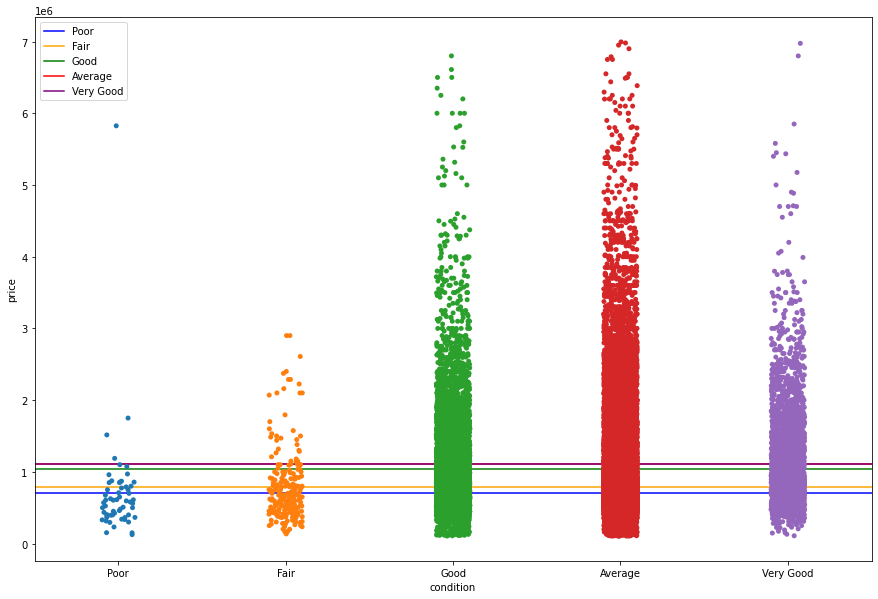

In [52]:
condition_stats, condition_results, condition_summary = simple_test.base_check_for_category(df_cat, 'condition')

In [53]:
condition_stats

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
Average,18385.0,1.104130e+06,751012.883837,104186.0,658000.0,860000.0,1300000.0,6995000.0
Fair,224.0,7.955592e+05,505105.974750,135000.0,471000.0,668500.0,923125.0,2900000.0
Good,8017.0,1.040761e+06,660864.215882,104920.0,615000.0,855000.0,1285000.0,6800000.0
Poor,59.0,7.025151e+05,745984.429476,125000.0,400000.0,580000.0,795000.0,5825000.0
Very Good,3242.0,1.111885e+06,682508.479528,108758.0,650000.0,900500.0,1400000.0,6975000.0


In [54]:
condition_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     4542.
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        20:02:23   Log-Likelihood:            -4.3765e+05
No. Observations:               29927   AIC:                         8.753e+05
Df Residuals:                   29921   BIC:                         8.754e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.073e+04   8254.337      2.512      0.012    4555.255    3.69e+04
sqft_living           498.5277      3.321    150.105      0.000     492.018     505.037
condition_Fair       1.889e+04   3.66e+04      0.517      0.605   -5.28e+04    9.06e+04
condition_Good       1.969e+04   7289.198      2.701      0.007    5400.152     3.4e+04
condition_Poor       3.124e+04   7.09e+04      0.441      0.659   -1.08e+05     1.7e+05
condition_Very Good  8.451e+04   1.04e+04      8.160      0.000    6.42e+04    1.05e+05
==============================================================================
Omnibus:                    15073.352   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           202490.729
Skew:                           2.100   Prob(JB):                         0.00
Kurtosis:                      15.031   Cond. No.                     5.22e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Lets try looking at nuisance

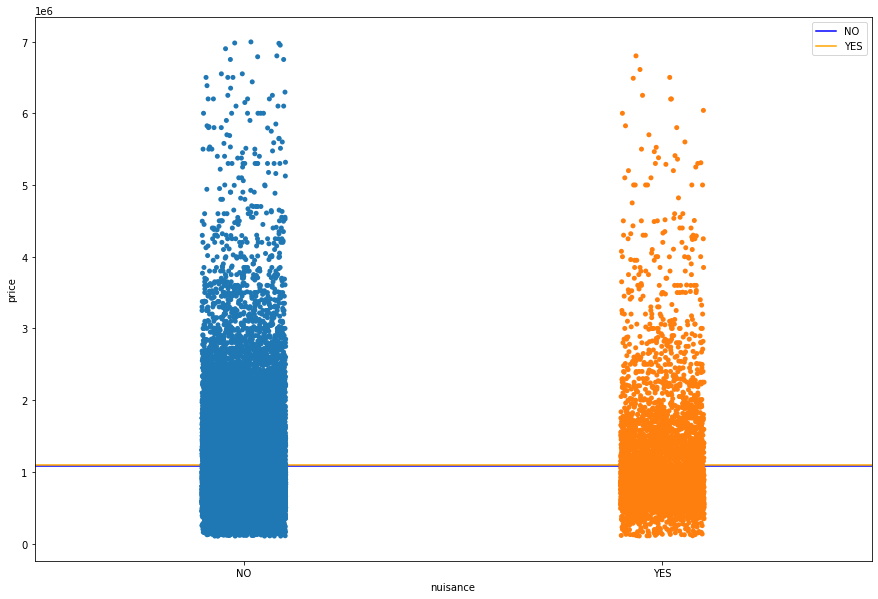

In [55]:
nuisance_stats, nuisance_results, nuisance_summary = simple_test.base_check_for_category(df_cat, 'nuisance')

In [56]:
nuisance_stats

,count,mean,std,min,25%,50%,75%,max
nuisance,,,,,,,,
NO,24736.0,1.083473e+06,708996.290375,104186.0,650000.0,862000.0,1300000.0,6995000.0
YES,5191.0,1.091659e+06,771224.184910,106088.0,650000.0,850000.0,1275000.0,6800000.0


In [57]:
nuisance_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                 1.139e+04
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        20:02:23   Log-Likelihood:            -4.3763e+05
No. Observations:               29927   AIC:                         8.753e+05
Df Residuals:                   29924   BIC:                         8.753e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.936e+04   7849.523      2.466      0.014    3974.007    3.47e+04
sqft_living    499.0550      3.307    150.927      0.000     492.574     505.536
nuisance_YES  8.588e+04   8300.703     10.346      0.000    6.96e+04    1.02e+05
==============================================================================
Omnibus:                    14941.703   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           197937.637
Skew:                           2.081   Prob(JB):                         0.00
Kurtosis:                      14.892   Cond. No.                     6.64e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

OK, model is not much better and this is telling us that the price goes up based on having a nuisance so that doesnt look right

## Heatsource?

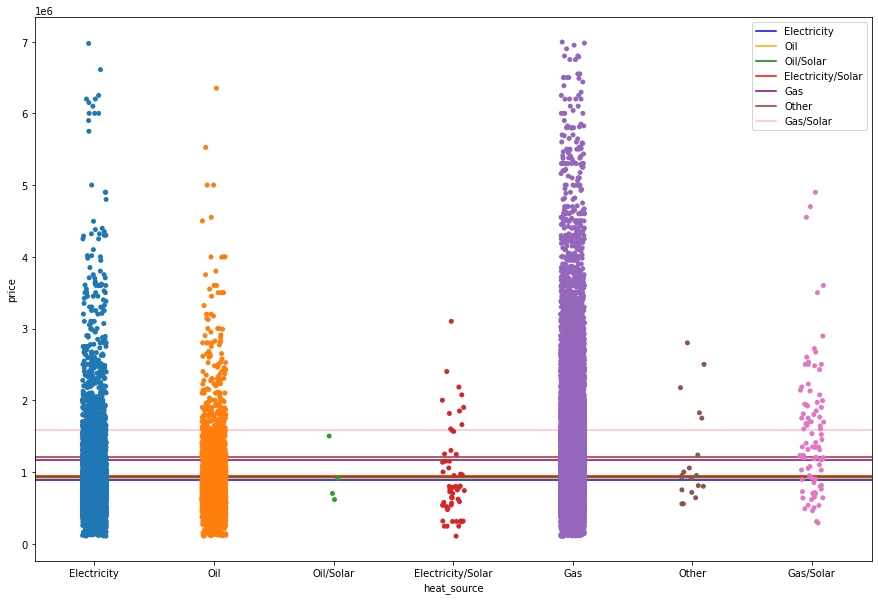

In [58]:
heat_stats, heat_results, heat_summary = simple_test.base_check_for_category(df_cat, 'heat_source')

In [59]:
heat_stats

,count,mean,std,min,25%,50%,75%,max
heat_source,,,,,,,,
Electricity,6419.0,8.891168e+05,565183.630323,104186.0,589900.00,750000.0,995700.00,6975000.0
Electricity/Solar,59.0,9.381008e+05,627059.661577,104920.0,526000.00,765000.0,1197500.00,3100000.0
Gas,20459.0,1.169025e+06,769020.328541,104725.0,675000.00,925000.0,1425000.00,6995000.0
Gas/Solar,90.0,1.585248e+06,909409.573458,290043.0,968104.25,1375000.0,1942576.75,4900000.0
Oil,2877.0,9.101851e+05,515491.372212,104946.0,605000.00,810000.0,1050000.00,6350000.0
Oil/Solar,4.0,9.321750e+05,398861.616562,615000.0,678750.00,806850.0,1060275.00,1500000.0
Other,19.0,1.205713e+06,672109.909835,555000.0,775000.00,950000.0,1493000.00,2800000.0


In [60]:
heat_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     3236.
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        20:02:24   Log-Likelihood:            -4.3766e+05
No. Observations:               29927   AIC:                         8.753e+05
Df Residuals:                   29919   BIC:                         8.754e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          3.112e+04   9007.766      3.454      0.001    1.35e+04    4.88e+04
sqft_living                     498.2769      3.443    144.731      0.000     491.529     505.025
heat_source_Electricity/Solar -7.428e+04   7.11e+04     -1.045      0.296   -2.14e+05     6.5e+04
heat_source_Gas                 283.3043   8009.981      0.035      0.972   -1.54e+04     1.6e+04
heat_source_Gas/Solar          2.435e+05   5.78e+04      4.216      0.000     1.3e+05    3.57e+05
heat_source_Oil                4.027e+04   1.22e+04      3.303      0.001    1.64e+04    6.42e+04
heat_source_Oil/Solar         -2.698e+04   2.72e+05     -0.099      0.921    -5.6e+05    5.06e+05
heat_source_Other               2.04e+05   1.25e+05      1.634      0.102   -4.07e+04    4.49e+05
==============================================================================
Omnibus:                    15005.333   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           200361.421
Skew:                           2.090   Prob(JB):                         0.00
Kurtosis:                      14.967   Cond. No.                     2.00e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### How about Grade?

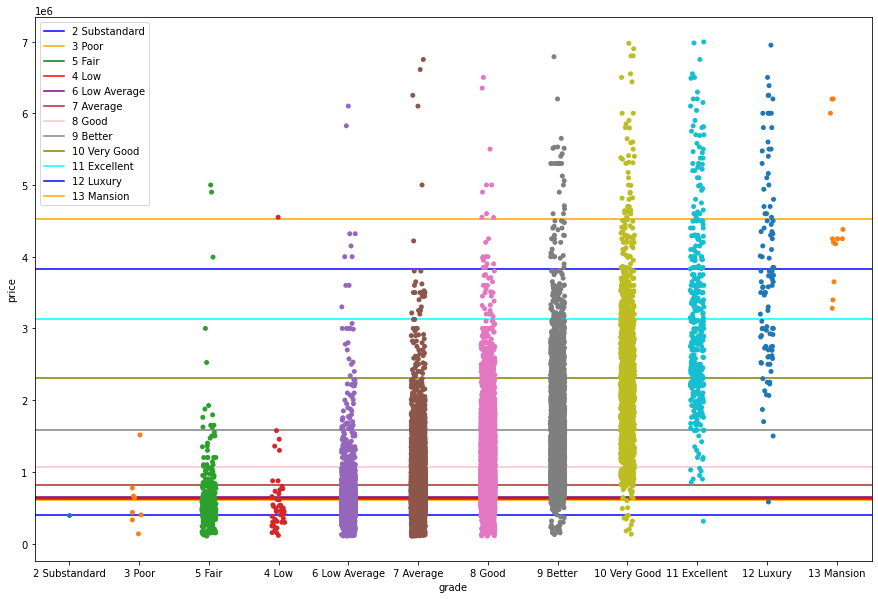

In [61]:
grade_stats, grade_results, grade_summary = simple_test.base_check_for_category(df_cat, 'grade')

In [62]:
grade_stats

,count,mean,std,min,25%,50%,75%,max
grade,,,,,,,,
10 Very Good,1357.0,2.311591e+06,9.809910e+05,131106.0,1690000.0,2177500.0,2800000.0,6975000.0
11 Excellent,382.0,3.138015e+06,1.243321e+06,310905.0,2242500.0,2850000.0,3850000.0,6995000.0
12 Luxury,104.0,3.826457e+06,1.293465e+06,580000.0,2848250.0,3702500.0,4600000.0,6950000.0
13 Mansion,12.0,4.519667e+06,1.037399e+06,3280000.0,4047500.0,4250000.0,4785000.0,6200000.0
2 Substandard,1.0,4.000000e+05,NaN,400000.0,400000.0,400000.0,400000.0,400000.0
3 Poor,8.0,6.115000e+05,4.189419e+05,135000.0,382500.0,537500.0,690250.0,1515000.0
4 Low,46.0,6.344368e+05,6.782346e+05,114491.0,316750.0,464000.0,684250.0,4550000.0
5 Fair,383.0,6.204781e+05,4.964090e+05,104975.0,400000.0,500000.0,699500.0,5000000.0
6 Low Average,2827.0,6.435828e+05,3.768254e+05,104946.0,460000.0,575000.0,725000.0,6100000.0


In [63]:
grade_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     2658.
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        20:02:24   Log-Likelihood:            -4.3524e+05
No. Observations:               29927   AIC:                         8.705e+05
Df Residuals:                   29914   BIC:                         8.706e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.235e+06   2.14e+04     57.654      0.000    1.19e+06    1.28e+06
sqft_living           289.6637      4.448     65.123      0.000     280.946     298.382
grade_11 Excellent   5.807e+05   2.93e+04     19.842      0.000    5.23e+05    6.38e+05
grade_12 Luxury      9.672e+05   5.17e+04     18.718      0.000    8.66e+05    1.07e+06
grade_13 Mansion     1.111e+06   1.46e+05      7.598      0.000    8.25e+05     1.4e+06
grade_2 Substandard -1.055e+06   5.01e+05     -2.103      0.035   -2.04e+06   -7.19e+04
grade_3 Poor        -8.454e+05   1.78e+05     -4.745      0.000   -1.19e+06   -4.96e+05
grade_4 Low         -7.826e+05   7.64e+04    -10.247      0.000   -9.32e+05   -6.33e+05
grade_5 Fair        -8.764e+05   3.16e+04    -27.754      0.000   -9.38e+05   -8.15e+05
grade_6 Low Average -9.428e+05   1.99e+04    -47.266      0.000   -9.82e+05   -9.04e+05
grade_7 Average      -9.13e+05   1.69e+04    -54.084      0.000   -9.46e+05    -8.8e+05
grade_8 Good        -8.045e+05    1.6e+04    -50.216      0.000   -8.36e+05   -7.73e+05
grade_9 Better       -4.88e+05   1.63e+04    -29.947      0.000    -5.2e+05   -4.56e+05
==============================================================================
Omnibus:                    15595.026   Durbin-Watson:                   1.913
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           255307.601
Skew:                           2.129   Prob(JB):                         0.00
Kurtosis:                      16.661   Cond. No.                     4.00e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  4e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Now running categories along with multilinear regression

In [64]:
df_best_nums = df_numeric[['price', 'bedrooms', 'sqft_living', 'sqft_basement']].copy()

In [65]:
df_best_nums['grade'] = df_cat['grade'].copy()

In [66]:
df_best_nums

,price,bedrooms,sqft_living,sqft_basement,grade
0,675000.0,4,1180,0,7 Average
1,920000.0,5,2770,1570,7 Average
2,311000.0,6,2880,1580,7 Average
3,775000.0,3,2160,1070,9 Better
4,592500.0,2,1120,550,7 Average
...,...,...,...,...,...
30150,1555000.0,5,1910,1130,8 Good
30151,1313000.0,3,2020,0,7 Average
30152,800000.0,3,1620,920,7 Average
30153,775000.0,3,2570,740,8 Good


In [67]:
# setting up a model for all chosen numerical variables with the best categorical 
y = df_best_nums['price']
X_cat = pd.get_dummies(df_best_nums.drop(['price'], axis=1), columns=['grade'])
X_cat = X_cat.drop(['grade_2 Substandard'], axis=1)

cat_results = sm.OLS(endog = y, exog = sm.add_constant(X_cat)).fit()
cat_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.523
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     2344.
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        20:02:24   Log-Likelihood:            -4.3502e+05
No. Observations:               29927   AIC:                         8.701e+05
Df Residuals:                   29912   BIC:                         8.702e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.141e+05   4.97e+05      0.430      0.667   -7.61e+05    1.19e+06
bedrooms            -2.832e+04   4022.201     -7.041      0.000   -3.62e+04   -2.04e+04
sqft_living           281.8784      5.806     48.548      0.000     270.498     293.259
sqft_basement         107.4703      5.426     19.807      0.000      96.835     118.105
grade_10 Very Good   1.102e+06   4.98e+05      2.214      0.027    1.26e+05    2.08e+06
grade_11 Excellent   1.669e+06   4.98e+05      3.349      0.001    6.92e+05    2.65e+06
grade_12 Luxury      2.034e+06      5e+05      4.067      0.000    1.05e+06    3.01e+06
grade_13 Mansion     2.185e+06   5.19e+05      4.213      0.000    1.17e+06     3.2e+06
grade_3 Poor          2.21e+05   5.28e+05      0.419      0.675   -8.13e+05    1.26e+06
grade_4 Low          2.819e+05   5.03e+05      0.561      0.575   -7.04e+05    1.27e+06
grade_5 Fair         1.941e+05   4.98e+05      0.390      0.697   -7.82e+05    1.17e+06
grade_6 Low Average  1.337e+05   4.98e+05      0.269      0.788   -8.42e+05    1.11e+06
grade_7 Average      1.614e+05   4.97e+05      0.324      0.746   -8.14e+05    1.14e+06
grade_8 Good          2.81e+05   4.98e+05      0.565      0.572   -6.94e+05    1.26e+06
grade_9 Better       6.126e+05   4.98e+05      1.231      0.218   -3.63e+05    1.59e+06
==============================================================================
Omnibus:                    15631.816   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           261976.950
Skew:                           2.128   Prob(JB):                         0.00
Kurtosis:                      16.856   Cond. No.                     1.42e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [68]:
cat_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.523
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     2344.
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        20:02:24   Log-Likelihood:            -4.3502e+05
No. Observations:               29927   AIC:                         8.701e+05
Df Residuals:                   29912   BIC:                         8.702e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.141e+05   4.97e+05      0.430      0.667   -7.61e+05    1.19e+06
bedrooms            -2.832e+04   4022.201     -7.041      0.000   -3.62e+04   -2.04e+04
sqft_living           281.8784      5.806     48.548      0.000     270.498     293.259
sqft_basement         107.4703      5.426     19.807      0.000      96.835     118.105
grade_10 Very Good   1.102e+06   4.98e+05      2.214      0.027    1.26e+05    2.08e+06
grade_11 Excellent   1.669e+06   4.98e+05      3.349      0.001    6.92e+05    2.65e+06
grade_12 Luxury      2.034e+06      5e+05      4.067      0.000    1.05e+06    3.01e+06
grade_13 Mansion     2.185e+06   5.19e+05      4.213      0.000    1.17e+06     3.2e+06
grade_3 Poor          2.21e+05   5.28e+05      0.419      0.675   -8.13e+05    1.26e+06
grade_4 Low          2.819e+05   5.03e+05      0.561      0.575   -7.04e+05    1.27e+06
grade_5 Fair         1.941e+05   4.98e+05      0.390      0.697   -7.82e+05    1.17e+06
grade_6 Low Average  1.337e+05   4.98e+05      0.269      0.788   -8.42e+05    1.11e+06
grade_7 Average      1.614e+05   4.97e+05      0.324      0.746   -8.14e+05    1.14e+06
grade_8 Good          2.81e+05   4.98e+05      0.565      0.572   -6.94e+05    1.26e+06
grade_9 Better       6.126e+05   4.98e+05      1.231      0.218   -3.63e+05    1.59e+06
==============================================================================
Omnibus:                    15631.816   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           261976.950
Skew:                           2.128   Prob(JB):                         0.00
Kurtosis:                      16.856   Cond. No.                     1.42e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

RMSE and MAE

In [69]:
mean_absolute_error(y, cat_results.predict(sm.add_constant(X_cat)))

326782.32655737305

In [70]:
mean_squared_error(y, cat_results.predict(sm.add_constant(X_cat)))

247299356288.22318

# Standardizing numerical data and running again to help with interpretation

In [71]:
# df_standardized = df_numeric.drop(['price'], axis=1).copy()
df_best_standardized = df_best_nums.copy()
df_best_standardized = df_best_standardized.drop(['grade'], axis=1)

for col in df_best_standardized:
    df_best_standardized[col] = (df_best_standardized[col] - df_best_standardized[col].mean()) / df_best_standardized[col].std()
    
# df_standardized['price'] = df_numeric['price']
df_best_standardized.describe()

,price,bedrooms,sqft_living,sqft_basement
count,2.992700e+04,2.992700e+04,2.992700e+04,2.992700e+04
mean,-1.025677e-16,-4.107458e-17,1.479160e-16,1.567007e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.361774e+00,-3.492967e+00,-2.211649e+00,-8.272539e-01
25%,-6.038763e-01,-4.232822e-01,-7.209115e-01,-8.272539e-01
50%,-3.122780e-01,-4.232822e-01,-1.948926e-01,-8.272539e-01
75%,2.986898e-01,5.999461e-01,5.310135e-01,8.155705e-01
max,8.206558e+00,9.809000e+00,1.394450e+01,7.072284e+00


In [72]:
# setting up a model for all chosen numerical variables with the best categorical 
df_best_standardized['grade'] = df_best_nums['grade'].copy()

y = df_best_standardized['price']
X_cat = pd.get_dummies(df_best_standardized.drop(['price'], axis=1), columns=['grade'])
X_cat = X_cat.drop(['grade_2 Substandard'], axis=1)

cat_results = sm.OLS(endog = y, exog = sm.add_constant(X_cat)).fit()
cat_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.523
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     2344.
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        20:02:25   Log-Likelihood:                -31382.
No. Observations:               29927   AIC:                         6.279e+04
Df Residuals:                   29912   BIC:                         6.292e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.4488      0.691     -0.650      0.516      -1.803       0.905
bedrooms               -0.0384      0.005     -7.041      0.000      -0.049      -0.028
sqft_living             0.3720      0.008     48.548      0.000       0.357       0.387
sqft_basement           0.0854      0.004     19.807      0.000       0.077       0.094
grade_10 Very Good      1.5300      0.691      2.214      0.027       0.175       2.885
grade_11 Excellent      2.3173      0.692      3.349      0.001       0.961       3.674
grade_12 Luxury         2.8249      0.695      4.067      0.000       1.463       4.186
grade_13 Mansion        3.0337      0.720      4.213      0.000       1.622       4.445
grade_3 Poor            0.3069      0.733      0.419      0.675      -1.129       1.743
grade_4 Low             0.3914      0.698      0.561      0.575      -0.977       1.760
grade_5 Fair            0.2695      0.692      0.390      0.697      -1.086       1.625
grade_6 Low Average     0.1856      0.691      0.269      0.788      -1.168       1.540
grade_7 Average         0.2241      0.691      0.324      0.746      -1.130       1.578
grade_8 Good            0.3901      0.691      0.565      0.572      -0.964       1.744
grade_9 Better          0.8506      0.691      1.231      0.218      -0.504       2.205
==============================================================================
Omnibus:                    15631.816   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           261976.950
Skew:                           2.128   Prob(JB):                         0.00
Kurtosis:                      16.856   Cond. No.                         817.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Results
- the model explains about 52.3% of the variance in the data overall
- the model is statistically significant
- p-values for all numeric feature coeficients are statistically significant
- p-values for 4 of the 11 grades are statistically significant
- The MAE for our final model came in at a variance of about $326,782 dollars



## Interpretation
- When looking at the standardized model, we see that sqft living and basement sq ft have the highest coef
    - This means that they will have the most drastic change to the model at scale and should be prioritized
    
- when we look at our regular model we can get some good interpretation taking everything else into consideration
    - given a substandard quality house with no bedrooms, no living sq ft, and no basement sqft, we would expect the house to be priced about \\$214,100
    - for every increase in bedroom by 1, we would expect the house value to drop by \\$28,320
    - for every increase in 1 square ft of living area, we would expect the house value to increase by about \\$281
    - for every increase in 1 square ft of basement area, we would expect the house value to increase by about \\$107

- We see statistically significant coefficients for building grade which represents the construction quality of improvements. We see that compared to a substandard home:
    - 'very good' quality improvements would increase home value by about \\$1,102,000
    - 'Excellent' quality improvements would increase home value by about \\$1,669,000
    - 'Luxury' quality improvements would increase home value by about \\$2,034,000
    - 'Mansion' quality improvements would increase home value by about\\$2,185,000

# Recommendations
- We recomment increasing the size of your home as the greatest impact to your renovation, first focusing on the total living area sq ft, then looking at basement area sq foot as a secondary (obviously this would be much more expensive then building above ground too)
- We recommend spending the extra dollars for quality craftsmanship as these pay off in the long run with vastly greater home values

# Gonna try and see if grade is better as a numerical

In [73]:
key = {
'2 Substandard' : 2,
'3 Poor' : 3,
'4 Low' : 4,
'5 Fair' : 5,
'6 Low Average' : 6,
'7 Average' : 7,
'8 Good' : 8,
'9 Better' : 9,
'10 Very Good' : 10,
'11 Excellent' : 11,
'12 Luxury' : 12,
'13 Mansion' : 13
}

In [74]:
df_best_nums['grade_num'] = df_best_nums["grade"].replace(key)

In [75]:
y = df_best_nums['price']
X_cat = df_best_nums.drop(['price', 'grade'], axis=1)

cat_results = sm.OLS(endog = y, exog = sm.add_constant(X_cat)).fit()
cat_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     7074.
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        20:02:25   Log-Likelihood:            -4.3614e+05
No. Observations:               29927   AIC:                         8.723e+05
Df Residuals:                   29922   BIC:                         8.723e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -9.554e+05   2.64e+04    -36.123      0.000   -1.01e+06   -9.04e+05
bedrooms      -7.246e+04   4038.414    -17.943      0.000   -8.04e+04   -6.45e+04
sqft_living     362.6165      5.741     63.168      0.000     351.365     373.868
sqft_basement    88.7737      5.581     15.907      0.000      77.835      99.712
grade_num      1.938e+05   3879.750     49.959      0.000    1.86e+05    2.01e+05
==============================================================================
Omnibus:                    15899.765   Durbin-Watson:                   1.917
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           240964.648
Skew:                           2.213   Prob(JB):                         0.00
Kurtosis:                      16.178   Cond. No.                     2.12e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Made it worse

# Here's the functions I made, saved outside of the .py file

### But first I save my model and plot

In [76]:
df_cat['millions'] = df_cat['price']/1000000

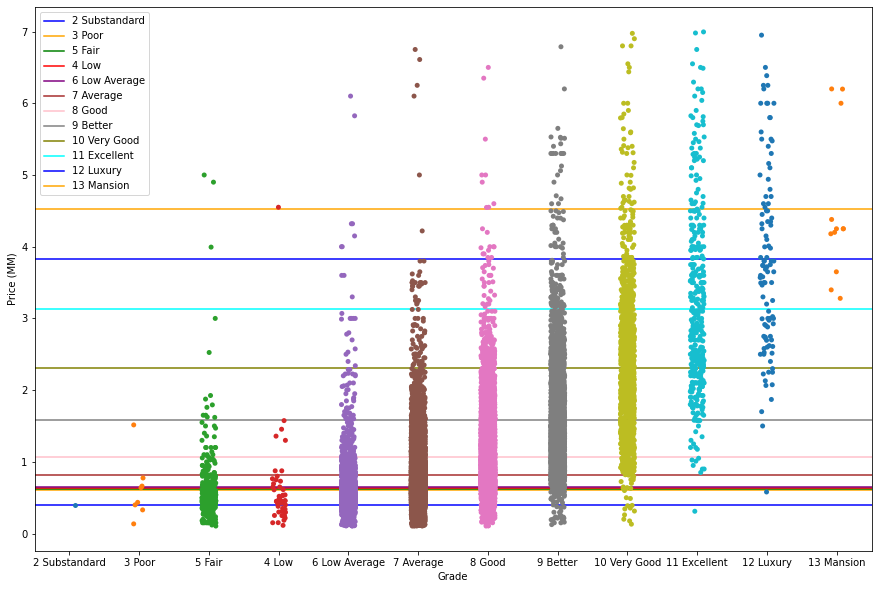

In [77]:
test_df = df_cat['grade'].sort_values().copy()
    
mean_list = []
for i in df_cat.groupby(['grade'])['millions'].mean().sort_values().index:
    mean_list.append(i)

fig, ax = plt.subplots(figsize=(15,10))
sns.stripplot(x=test_df, y=df_cat['millions'], order=mean_list, palette="tab10")

colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
colors = colors *2
    
for i, category in enumerate(mean_list):
    ax.axhline(y=df_cat.groupby(['grade'])['millions'].mean().sort_values().values[i],
                   color = colors[i], label = f"{category}");
ax.set_ylabel('Price (MM)')
ax.set_xlabel('Grade')    
ax.legend()

# # Model the category
# y = df_cat['price']
# X_cat = df_cat[['grade']].copy()
# # X_cat['sqft_living'] = df_numeric['sqft_living'].copy()
# X_cat = pd.get_dummies(X_cat, columns=[category_column], drop_first=True)
plt.savefig('grade_chart.jpg', format='jpg')

In [78]:
def simple_num_model_all_combos(df, target_var):
    
    '''
    input: dataframe of numerical features and this will run a linear regression 
    model for all columns against the input target var.
    
    return: r^2, adjusted r^2, f-stat prob, const coef, predictor coef, const p-val and predictor p-val.
    return values will be sorted in descending order based on adjusted r^2 values.
    
    Unlike usual models, target_var should be included in the same dataframe as potential x_vars.
    
    df should be a dataframe.
    target_var should be a column name in a string form.
    
    example: simple_num_model_all_combos(df_numeric, 'price')
    '''
    column = []
    r2 = []
    r2_adj = []
    f_stat_p_val = []
    const_coefs = []
    predictor_coef = []
    const_p_val = []
    predictor_p_val =[]
    
    
    for col in df:
        if col != target_var:
            X = df[[col]]
            y = df[target_var]

            model = sm.OLS(y, sm.add_constant(X)).fit()
            column.append(col)
            r2.append(model.rsquared)
            r2_adj.append(model.rsquared_adj)
            f_stat_p_val.append(model.f_pvalue)
            const_coefs.append(model.params.values[0])
            predictor_coef.append(model.params.values[1])
            const_p_val.append(model.pvalues.values[0])
            predictor_p_val.append(model.pvalues.values[1])
        else:
            continue
  
        
    col_list = [column, r2, r2_adj, f_stat_p_val, const_coefs, predictor_coef, const_p_val, predictor_p_val]
    col_list_names = ['column', 'r2', 'r2_adj', 'f_stat_p_val', 'const_coefs', 'predictor_coef', 'const_p_val', 'predictor_p_val']

    output_df = pd.DataFrame(col_list, index = col_list_names)

    output_df_transposed = output_df.T
            
    return output_df_transposed.sort_values('r2_adj', ascending=False)

In [79]:
def multi_num_model_all_combos(df, target_var):
    
    '''
    input: dataframe of numerical features and this will run all variations 
    of a linear regression model for each combination of features against the input target var.
    
    return: r^2, adjusted r^2, f-stat prob
    return values will be sorted in descending order based on adjusted r^2 values.
    
    Unlike usual models, target_var should be included in the same dataframe as potential x_vars.
    
    df should be a dataframe.
    target_var should be a column name in a string form.
    
    example: multi_num_model_all_combos(df_numeric, 'price')
    '''
    
    column = []
    r2 = []
    r2_adj = []
    f_stat_p_val = []
    const_coefs = []
    const_p_val = []

#     predictor_coef = []
#     predictor_p_val =[]
    
    list_of_combos = []
    p_value_good = []
    MAE = []
    RMSE = []
#     target_var = 'price'

    function_df = df.drop([target_var], axis=1).copy()
    for i, x in enumerate(function_df):
        list_of_combos.append(list(combinations(function_df, i+1)))
    
    for i in range(len(list_of_combos)):

        for combo in list_of_combos[i]:
            # created a temp list to hold each column name combination
            temp_list = []
            for x in combo:
                temp_list.append(x)
                X = function_df[temp_list]
                y = df[target_var]

            model = sm.OLS(y, sm.add_constant(X)).fit()
            column.append(temp_list)
            r2.append(model.rsquared)
            r2_adj.append(model.rsquared_adj)
            f_stat_p_val.append(model.f_pvalue)
            const_coefs.append(round(model.params.values[0], 4))
            const_p_val.append(round(model.pvalues.values[0], 4))
            good = 0
            for p in model.pvalues:
                total = len(model.pvalues)
                if p <= .05:
                    good += 1
            p_value_good.append((good/total)*100)
            MAE.append(mean_absolute_error(y, model.predict(sm.add_constant(X))))
            RMSE.append(mean_squared_error(y, model.predict(sm.add_constant(X)), squared=False))


#             if i == range(len(list_of_combos))[-1]:
#             for x in list_of_combos[i]:
#                 p_value_names.append(x)
                   
#             predictor_coef.append(model.params.values[1])
#             predictor_p_val.append(model.pvalues.values[1])
  
        
    col_list = [column, r2, r2_adj, f_stat_p_val, const_coefs, const_p_val, p_value_good, MAE, RMSE]
#                 , predictor_coef, predictor_p_val]
    col_list_names = ['column', 'r2', 'r2_adj', 'f_stat_p_val', 'const_coefs', 'const_p_val', '%p_val < .05', 'MAE', 'RMSE']
#                       , 'predictor_coef', 'predictor_p_val']

    output_df = pd.DataFrame(col_list, index = col_list_names)

    output_df_transposed = output_df.T
    
    output_df_transposed = output_df_transposed.sort_values('r2_adj', ascending=False).reset_index()
    
    
    top_3 = f"The top three combos are: \n\
    - {output_df_transposed['column'][0]} \n\
    \t- adj_r2: {output_df_transposed['r2_adj'][0]} \n\
    \t- ratio of p-vals <.05: {output_df_transposed['%p_val < .05'][0]}\n\
    - {output_df_transposed['column'][1]} \n\
    \t- adj_r2: {output_df_transposed['r2_adj'][1]}, \n\
    \t- ratio of p-vals <.05: {output_df_transposed['%p_val < .05'][1]}\n\
    - {output_df_transposed['column'][2]} \n\
    \t- adj_r2: {output_df_transposed['r2_adj'][2]}, \n\
    \t- ratio of p-vals <.05: {output_df_transposed['%p_val < .05'][2]}"
    
    # trying to get p_values for all coefs into the df but this is hard and i'm gonna comment this out and stop
#     for x in p_value_names:
#         for name in x:
#             output_df_transposed[f"p_val {name}"] = np.nan
            
    return output_df_transposed, print(top_3)

In [80]:
def base_check_for_category(df, category_column):
    
    '''
    Input a dataframe and specify a target column from the dataframe. 
    The dataframe needs to have categorical information only.
    
    Output is a stripplot of the category, statistics on the avg home price 
    when grouped by the category column, and a one-hot encoded model with the 
    first col dropped.
    '''
    
# Check how the categories in the feature compare to the price distribution
    stats = df.groupby([category_column])['price'].describe()
    
# Creating a chart of the column categories    
#     temp_list = list(df[category_column].unique())
#     sorted_list = sorted(temp_list)
    test_df = df[category_column].sort_values()
    
    mean_list = []
    for i in df.groupby([category_column])['price'].mean().sort_values().index:
        mean_list.append(i)

    fig, ax = plt.subplots(figsize=(15,10))
    sns.stripplot(x=test_df, y=df['price'], order=mean_list, palette="tab10")

    colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
    colors = colors *2
    
    for i, category in enumerate(mean_list):
#         z = i+1
        ax.axhline(y=df.groupby([category_column])['price'].mean().sort_values().values[i],
                   color = colors[i], label = f"{category}");
    ax.legend()

# Model the category
    y = df['price']
    X_cat = df[[category_column]].copy()
    X_cat['sqft_living'] = df_numeric['sqft_living'].copy()
    X_cat = pd.get_dummies(X_cat, columns=[category_column], drop_first=True)

    cat_results = sm.OLS(endog = y, exog = sm.add_constant(X_cat)).fit()
    
# get a summary of the model
    cat_summary = cat_results.summary()
    return stats, cat_results, cat_summary

In [81]:
def check_for_category_multi(category_column):
    
# Check how the categories in the feature compare to the price distribution
    stats = df_all_cat_reduced.groupby([category_column])['price'].describe()
    
# Creating a chart of the column categories    
    temp_list = list(df_all_cat_reduced[category_column].unique())

    fig, ax = plt.subplots(figsize=(15,10))
    sns.stripplot(x=df_all_cat_reduced[category_column], y=df_all_cat_reduced['price'])

    colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
    colors = colors *2
    
    for i, category in enumerate(temp_list):
        z = i+1
        ax.axhline(y=df_all_cat_reduced.groupby([category_column])['price'].mean().values[i],
                   color = colors[i], label = f"{category}");
    ax.legend()

# Model the category
    y = df_numeric['price']
    X_cat = X_standardized.copy()
    X_cat[category_column] = df_all_cat_reduced[[category_column]].copy()
    X_cat = pd.get_dummies(X_cat, columns=[category_column], drop_first=True)

    cat_results = sm.OLS(endog = y, exog = sm.add_constant(X_cat)).fit()
    
# get a summary of the model
    cat_summary = cat_results.summary()
    return stats, cat_results, cat_summary